<a href="https://colab.research.google.com/github/RautRitesh/Text_Classfication_Neural_Network/blob/main/Text_Classification_With_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
pip install tensorflow==2.12

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.6 MB/s eta 0:00:00
  At

In [1]:
import zipfile
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
zip_file = zipfile.ZipFile("/content/archive (6).zip")
zip_file.extractall()
zip_file.close()

In [3]:
df= pd.read_csv("spam_dataset.csv")

In [4]:
df.head()

,message_content,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",0
1,"Congratulations, you've won a prize! Call us n...",1
2,You have been pre-approved for a credit card w...,1
3,"Limited time offer, act now! Only a few spots ...",1
4,Your loan has been approved! Transfer funds to...,1


In [5]:
df.tail()

,message_content,is_spam
995,"Hello Virginia,\n\nIt was great to catch up wi...",0
996,Final notice: Claim your inheritance from a di...,1
997,Hot singles in your area want to chat! Contact...,1
998,Your loan has been approved! Transfer funds to...,1
999,"Dear Brian,\n\nI wanted to let you know about ...",0


In [6]:
df.tail(20)

,message_content,is_spam
980,You've won a free gift card worth $100! Click ...,1
981,"Dear Vincent,\n\nI hope you’re doing well. I j...",0
982,"Dear Christian,\n\nI wanted to let you know ab...",0
983,You have been pre-approved for a credit card w...,1
984,Your loan has been approved! Transfer funds to...,1
985,"Hi Brandon,\n\nJust a quick reminder about our...",0
986,"Hi Melissa,\n\nJust a quick reminder about our...",0
987,"Hello Eric,\n\nI wanted to follow up on our la...",0
988,"Hello Tina,\n\nPlease review the attached docu...",0
989,"Hello Dylan,\n\nI wanted to follow up on our l...",0


##For any Machine Learning Problem our first task is to become "One With The Data".Now for our data, its head and tail was check to find whether it has got randomness in spam or not.And our data has got randomness.Now checking "Null value" and "Only Space".

In [7]:
df.isnull().sum()

,0
message_content,0
is_spam,0


In [8]:
blank=[]
for row in df.itertuples():
  if(row.message_content).isspace():
    blank.append(row.message_content)

In [9]:
blank

[]

In [10]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   message_content  1000 non-null   object
 1   is_spam          1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


##Lets check how is the distribution of the data.If the distribution of the data is balanced then woohoo,  our model can be trained effectively. However we must prioritize for balanced datasets


In [11]:
len(df[df['is_spam']==1])

500

In [12]:

len(df[df['is_spam']==0])

500

## Now lets check some random text message and its label, to understand the "Message_Content" and its result.

In [13]:
import random

In [14]:
random_index = random.randint(0,len(df)-5)
for row in df[random_index:random_index+5].itertuples():
  _,message,is_spam=row
  print(f"{is_spam}","(Spam)" if is_spam == 1 else "(Not Spam)" )
  print(f"{message}")
  print("\n")


0 (Not Spam)
Hi Christine,

I wanted to remind you about our upcoming deadline. Please ensure all tasks are completed by 2024-03-25. Treat street stay form theory hotel. Knowledge arrive church family class two. Structure affect value time.
Letter item evidence just effect. During be training class religious.

Thanks,
Thomas Miles

Please find attached the updated project plan. Let me know if you have any questions.

If you have any questions, please feel free to reach out.


0 (Not Spam)
Hello Robert,

It was great to catch up with you earlier. Let’s discuss the next steps over a call next week. Per environment support choose. Discuss again after.
Science ever present second magazine. Education pick green TV place partner.
Top thought practice save.
Fly husband soon social.

Regards,
Gwendolyn Le

I appreciate your attention to this matter. Looking forward to your response.

If you have any questions, please feel free to reach out.


1 (Spam)
Limited time offer, act now! Only a few sp

In [15]:
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub


In [16]:
train_sentences,test_sentences,train_sentences_labels,test_sentences_lables=train_test_split(df['message_content'].to_numpy(),
                                                                                             df['is_spam'].to_numpy(),
                                                                                             random_state=42,
                                                                                             test_size=0.3)

In [17]:
sentence_encoder_layer= hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2",
                                      input_shape=[],
                                      dtype = tf.string,
                                      trainable=False,
                                      )

In [24]:
model = tf.keras.Sequential([
    sentence_encoder_layer,
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [25]:
model.compile( loss =tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [33]:
history=model.fit(train_sentences,train_sentences_labels,epochs=10,validation_data=(test_sentences,test_sentences_lables))

Epoch 1/10
22/22 [==============================] - 1s 28ms/step - loss: 1.5115e-04 - accuracy: 1.0000 - val_loss: 2.0067e-04 - val_accuracy: 1.0000
Epoch 2/10
22/22 [==============================] - 0s 17ms/step - loss: 1.3019e-04 - accuracy: 1.0000 - val_loss: 1.7730e-04 - val_accuracy: 1.0000
Epoch 3/10
22/22 [==============================] - 0s 17ms/step - loss: 1.1296e-04 - accuracy: 1.0000 - val_loss: 1.5673e-04 - val_accuracy: 1.0000
Epoch 4/10
22/22 [==============================] - 0s 18ms/step - loss: 9.8890e-05 - accuracy: 1.0000 - val_loss: 1.3955e-04 - val_accuracy: 1.0000
Epoch 5/10
22/22 [==============================] - 0s 17ms/step - loss: 8.7003e-05 - accuracy: 1.0000 - val_loss: 1.2595e-04 - val_accuracy: 1.0000
Epoch 6/10
22/22 [==============================] - 0s 17ms/step - loss: 7.7143e-05 - accuracy: 1.0000 - val_loss: 1.1359e-04 - val_accuracy: 1.0000
Epoch 7/10
22/22 [==============================] - 0s 20ms/step - loss: 6.8816e-05 - accuracy: 1.0000 - v

In [ ]:
pd.DataFrame()

In [32]:
text="Dear Ritesh , You have won a million dollar"
text = tf.constant(text)
text = tf.expand_dims(text,-1)
model_pred_probs= model.predict(text)
model_pred=tf.squeeze(tf.round(model_pred_probs))
print(f"{model_pred}","(Spam)" if model_pred == 1 else "(Not Spam)")

1/1 [==============================] - 0s 20ms/step
1.0 (Spam)


In [38]:
import mlxtend

In [40]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [42]:
y_pred = model.predict(test_sentences)

10/10 [==============================] - 0s 30ms/step


In [43]:
y_pred_actual = tf.squeeze(tf.round(y_pred))

In [44]:
cm = confusion_matrix(test_sentences_lables,y_pred_actual)

In [45]:
cm

array([[152,   0],
       [  0, 148]])

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

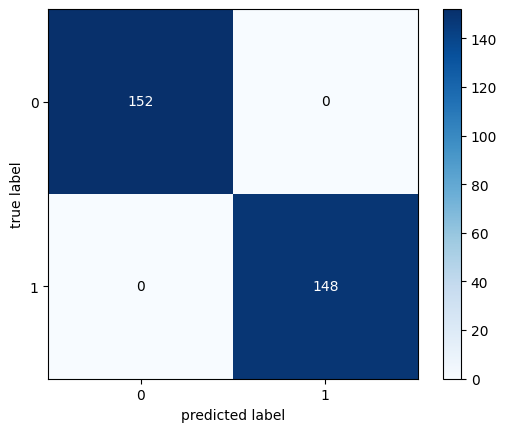

In [46]:
plot_confusion_matrix(cm,colorbar=True)

## WOOOHOOO!!! for our model the predictions are True positive and True negative hence making our one of the best model.